# Exploratory Data Analysis For Penguin DataSet


### Dataset Description

This dataset is related to Penguin species

The columns in the dataset are as follows:

* Species: Species that we have observed(Adelie,Gentoo,Chinstrap)

* Island:Islands where the penguin was observed(Biscoe,Dream,Torgersen)

* bill_length_mm: The length of the penguin's bill (beak) in millimeters.

* bill_depth_mm: The depth (height) of the penguin's bill in millimeters.

* flipper_length_mm: The length of the penguin's flipper\wing in millimeters.

* body_mass_g: The body mass of the penguin in grams.

* sex: The gender of the penguin.

#### Importing The Required libraries

In [149]:
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

##### Reading the Dataset and displaying some rows

In [150]:
df = pd.read_csv('dataset.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


##### Before Cleaning the dataset

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [152]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


#### Q1:Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it

##### Code

In [153]:
# Identifying missing data
missing_data = df.isnull().sum()
print(missing_data)

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [154]:
df_clean = df.copy()
df_clean['bill_length_mm'].fillna(df_clean['bill_length_mm'].mean(), inplace=True)
df_clean['bill_depth_mm'].fillna(df_clean['bill_depth_mm'].mean(), inplace=True)
df_clean['flipper_length_mm'].fillna(df_clean['flipper_length_mm'].mean(), inplace=True)
df_clean['body_mass_g'].fillna(df_clean['body_mass_g'].mean(), inplace=True)
df_clean['sex'].fillna(df_clean['sex'].mode()[0], inplace=True)

##### Explanation

We will find the  missing data in the dataset using isnull() method of dataframe. 
There are missing values in several columns. 

To clean the data, In general we will have two choices:

1. Dropping rows that contain missing data.
2. Imputing missing values with appropriate measures:

    * For numerical columns (bill_length_mm, flipper_length_mm), we use the column mean.
    
    * For categorical columns (sex), we use the mode.

* Here I have adapted the second method since the no of rows in the dataset are less 

##### After cleaning the Dataset

In [155]:
df_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.876855,17.15117,200.915205,4273.976608,male
4,Adelie,Torgersen,36.700000,19.30000,193.000000,3450.000000,female


In [156]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [157]:
df_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.422408,1.969027,14.020657,1115.961772
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,43.876855,17.300000,197.000000,4050.000000
75%,48.400000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,15000.000000


#### Q2: What is the average body_mass_g for Gentoo penguins?

In [158]:
df_gentoo = df_clean[df_clean['species'] == 'Gentoo'].reset_index()
df_gentoo

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,152,Gentoo,Biscoe,46.100000,13.20000,211.000000,4500.000000,female
1,153,Gentoo,Biscoe,50.000000,16.30000,230.000000,5700.000000,male
2,154,Gentoo,Biscoe,48.700000,14.10000,210.000000,4450.000000,female
3,155,Gentoo,Biscoe,50.000000,15.20000,218.000000,5700.000000,male
4,156,Gentoo,Biscoe,47.600000,14.50000,215.000000,5400.000000,male
...,...,...,...,...,...,...,...,...
119,271,Gentoo,Biscoe,43.876855,17.15117,200.915205,4273.976608,male
120,272,Gentoo,Biscoe,46.800000,14.30000,215.000000,4850.000000,female
121,273,Gentoo,Biscoe,50.400000,15.70000,222.000000,5750.000000,male
122,274,Gentoo,Biscoe,45.200000,14.80000,212.000000,5200.000000,female


In [159]:
gentoo_avg = df_gentoo['body_mass_g'].mean()
print("The average body mass of gentoo pengiuns is:",gentoo_avg)

The average body mass of gentoo pengiuns is: 5126.806262969251


#### Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. 

##### Code

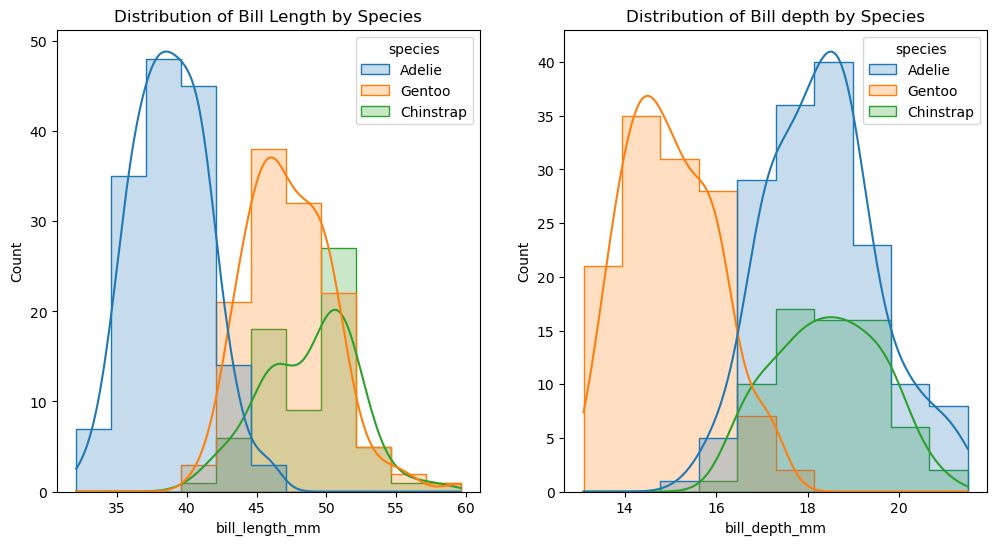

In [160]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='bill_length_mm',hue='species',kde=True,element='step')
plt.title('Distribution of Bill Length by Species')

plt.subplot(1,2,2)
sns.histplot(data=df_clean,x='bill_depth_mm',hue='species',kde=True,element='step')
plt.title('Distribution of Bill depth by Species')
plt.show()

In [161]:
def calc_stats_for_species(df):
    bill_length_stats = {
        'skewness': skew(df['bill_length_mm']),
        'kurtosis': kurtosis(df['bill_length_mm'])
    }
    bill_depth_stats = {
        'skewness': skew(df['bill_depth_mm']),
        'kurtosis': kurtosis(df['bill_depth_mm'])
    }
    return {'bill_length_mm': bill_length_stats, 'bill_depth_mm': bill_depth_stats}

adelie_stats = calc_stats_for_species(df_clean[df_clean['species'] == 'Adelie'])
gentoo_stats = calc_stats_for_species(df_clean[df_clean['species'] == 'Gentoo'])
chinstrap_stats = calc_stats_for_species(df_clean[df_clean['species'] == 'Chinstrap'])

In [162]:
adelie_stats_df = pd.DataFrame(adelie_stats)
gentoo_stats_df = pd.DataFrame(gentoo_stats)
chinstrap_stats_df = pd.DataFrame(chinstrap_stats)

In [163]:
print("Adelie Stats:")
adelie_stats_df

Adelie Stats:


,bill_length_mm,bill_depth_mm
skewness,0.162533,0.329209
kurtosis,-0.228104,-0.101072


In [164]:
print("Gentoo Stats:")
gentoo_stats_df

Gentoo Stats:


,bill_length_mm,bill_depth_mm
skewness,0.712323,0.334623
kurtosis,1.147647,-0.611126


In [165]:
print("Chinstrap Stats:")
chinstrap_stats_df

Chinstrap Stats:


,bill_length_mm,bill_depth_mm
skewness,-0.095936,0.006726
kurtosis,-0.124011,-0.898740


##### Explanation

To understand how bill_length_mm and bill_depth_mm differ among species, we calculate the skewness and kurtosis for each species:

* Skewness tells us how asymmetric the data distribution is. A skewness near 0 means the data is symmetrically distributed, positive values indicate right-skew, and negative values indicate left-skew.
* Kurtosis measures the "tailedness" of the distribution. Higher kurtosis indicates heavier tails.


* Bill Length

    * Adelie: Slightly negatively skewed (tail on left),with the peak around 37 mm.Most penguins have shorter bills, and a small number have longer ones.

    * Gentoo: Positively skewed (tail on right),with a peak around 46 mm. There are more penguins with shorter bills, but a significant right tail indicates some with much longer bills.

    * Chinstrap: Slightly negatively skewed (tail on left),with a peak around 53 mm.

* Bill Depth

    * Adelie: Slight negative skew, close to symmetric,with a peak around 18.5 mm.

    * Gentoo: Positively skewed (tail on right),with a peak around 15 mm.Most penguins have smaller bill depths, but a few have larger ones.

    * Chinstrap: Mostly symmetric,centered around 18.5 mm..

#### Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers

In [166]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [167]:
outliers_bill_length = detect_outliers(df_clean, 'bill_length_mm')
outliers_bill_depth = detect_outliers(df_clean, 'bill_depth_mm')
outliers_flipper_length = detect_outliers(df_clean, 'flipper_length_mm')
outliers_body_mass = detect_outliers(df_clean, 'body_mass_g')

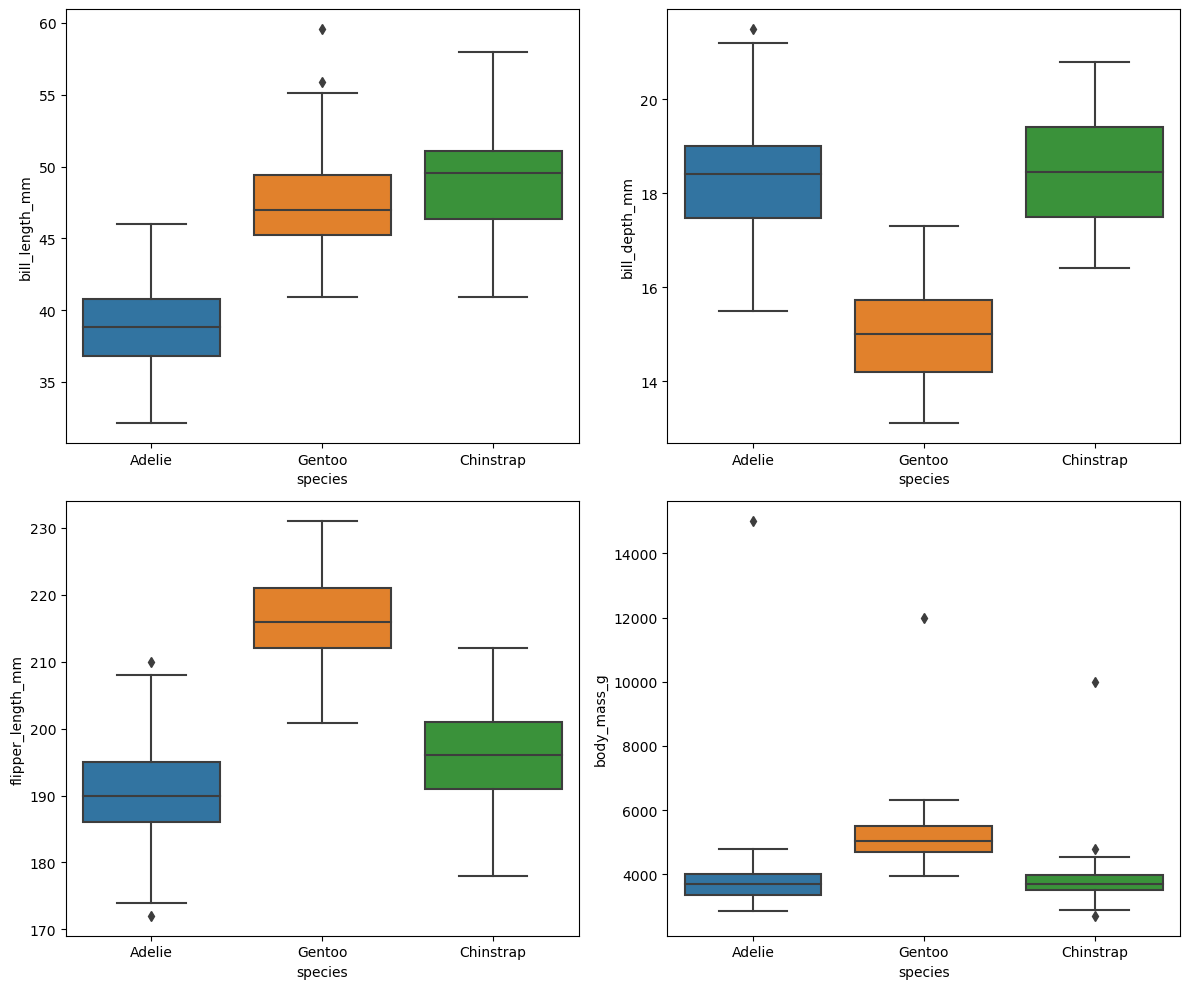

In [168]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df_clean, x='species', y='bill_length_mm', ax=axs[0, 0])
sns.boxplot(data=df_clean, x='species', y='bill_depth_mm', ax=axs[0, 1])
sns.boxplot(data=df_clean, x='species', y='flipper_length_mm', ax=axs[1, 0])
sns.boxplot(data=df_clean, x='species', y='body_mass_g', ax=axs[1, 1])
plt.tight_layout()
plt.show()

##### Explanation

* using interquartile range

    * Sort the data in ascending order
    * find median (Q2)
    * Divide the dataset in 2 parts, before median and after median
    * find median of first part (Q1)
    * find median of second part (Q3) and computer Interquratile range(IQR) = Q3 - Q1
    * The point is outlier if and only if Q1 - 1.5IQR > x or x > Q3 + 1.5IQR

* Gentoo and Chinstrap have more outliers in bill length.

* Adelie has outliers in bill depth and flipper length.

* Body mass has outliers across all species, with Adelie showing extreme values.

#### Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA

##### Code

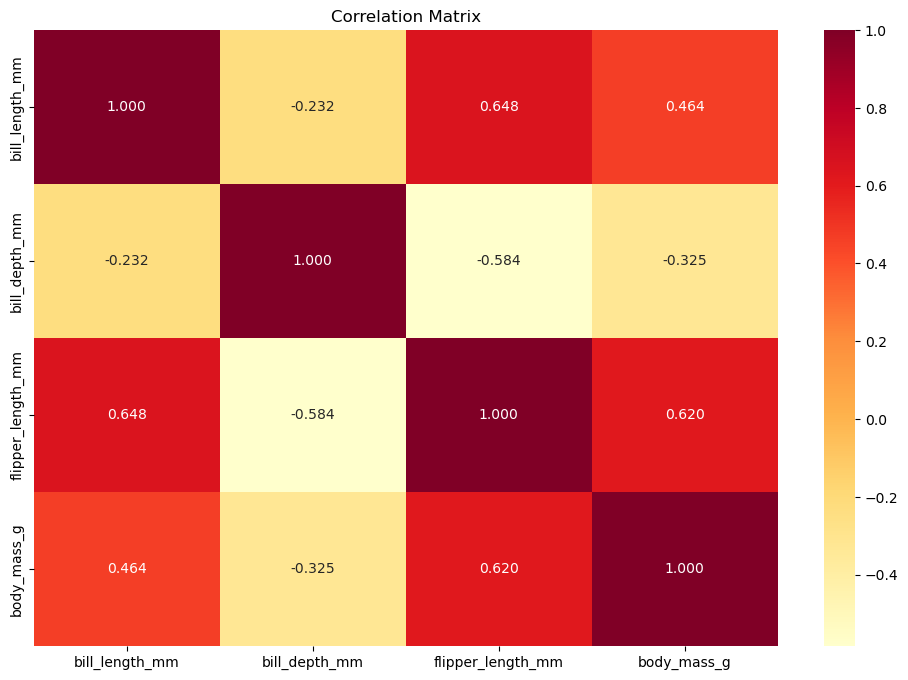

In [169]:
df_1 = df_clean.select_dtypes(include=[float, int])
corr_matrix = df_1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

In [170]:
pca = PCA()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_1)

pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


n_components = sum(cumulative_variance < 0.90) + 1  
print(f"Number of components to retain for 90% variance: {n_components}")

pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

Number of components to retain for 90% variance: 3


In [171]:
reduced_data_df = pd.DataFrame(reduced_data)

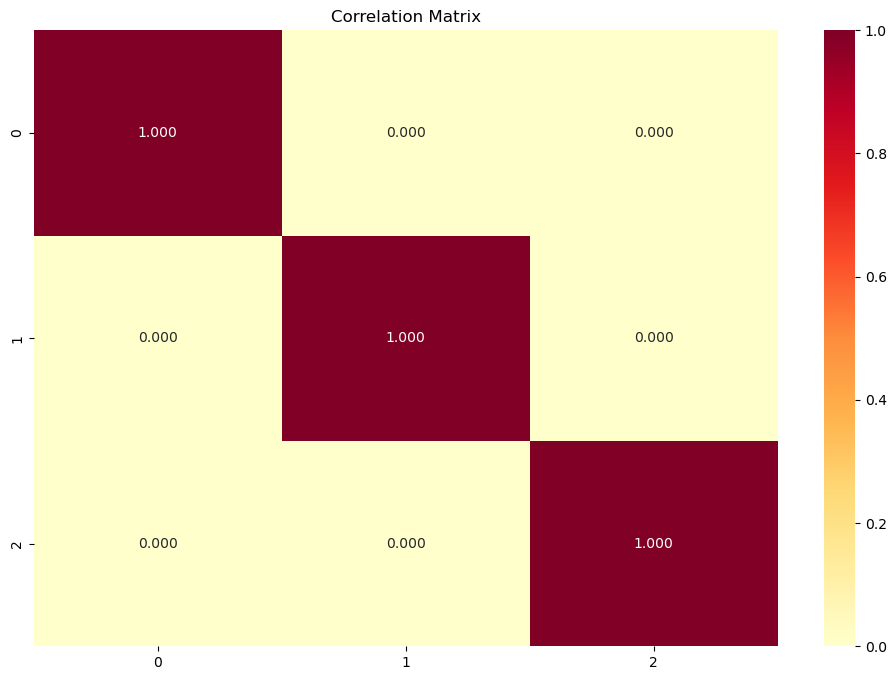

In [172]:
corr_matrix = reduced_data_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

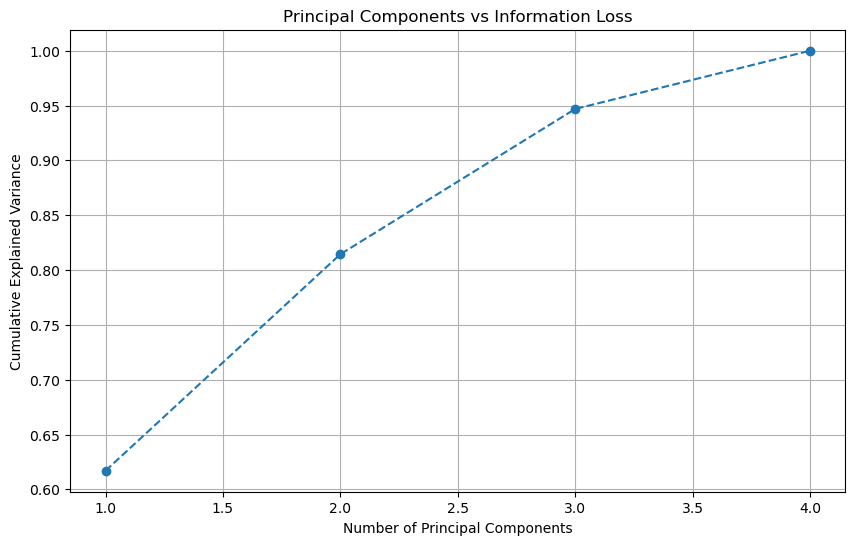

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Principal Components vs Information Loss')
plt.grid(True)
plt.show()

##### Explanation

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information in the large set. Here, we applied PCA to our dataset to address the curse of dimensionality, which can occur when the number of features is very high compared to the number of observations.

1. **Standardization**: We first standardized the data to have a mean of 0 and a standard deviation of 1. This step is crucial because PCA is sensitive to the variances of the initial variables.

2. **PCA Fit**: We then fitted the PCA model to the standardized data. The `explained_variance_ratio_` attribute of the PCA object tells us how much variance each principal component captures from the data.

3. **Choosing Components**: We selected the number of principal components to retain based on the cumulative explained variance. In this case, we chose enough components to retain 90% of the variance in the data.

4. **Transforming Data**: Finally, we transformed the original data into the reduced space defined by the selected principal components.

##### Conclusion
By applying PCA, we reduced the dimensionality of our dataset while retaining most of the original variance.

#### Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.

* Scatter Plot

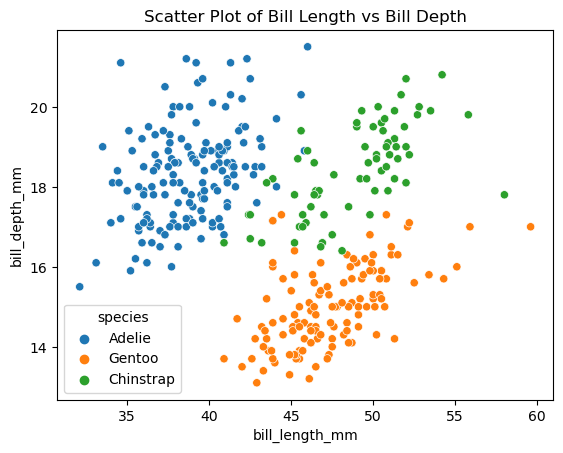

In [174]:
sns.scatterplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.show()

* KDE plot

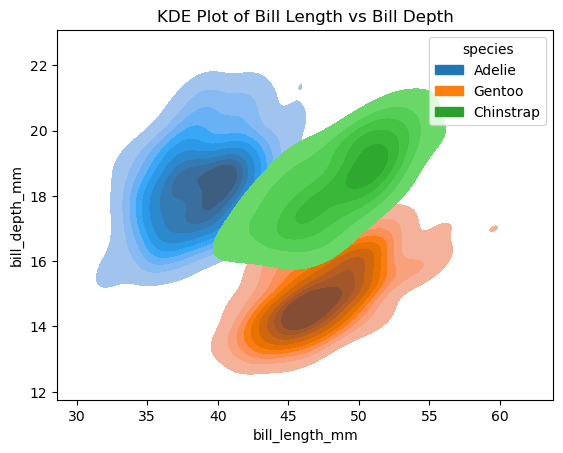

In [175]:
sns.kdeplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True)
plt.title('KDE Plot of Bill Length vs Bill Depth')
plt.show()

* Joint point

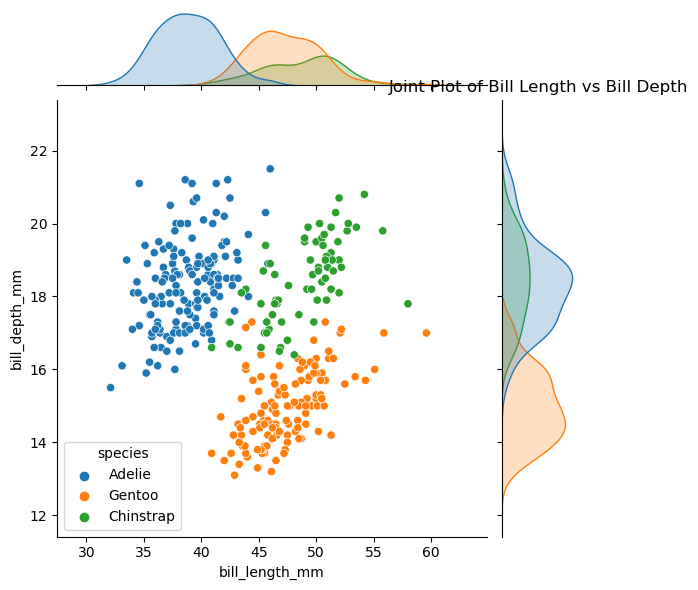

In [176]:
sns.jointplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Joint Plot of Bill Length vs Bill Depth')
plt.show()

* Pair plot

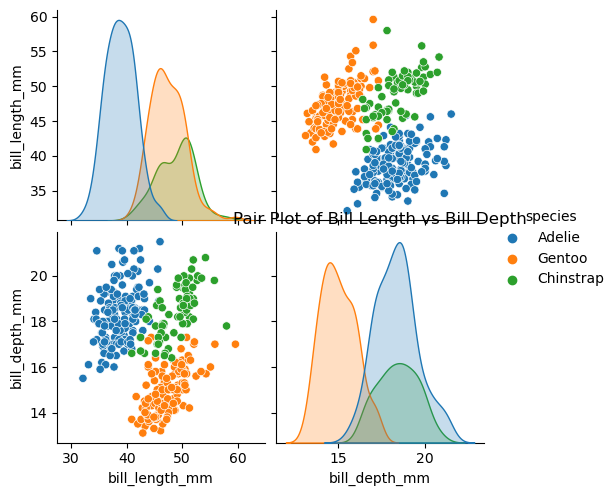

In [177]:
sns.pairplot(df_clean, hue='species', vars=['bill_length_mm', 'bill_depth_mm'])
plt.title('Pair Plot of Bill Length vs Bill Depth')
plt.show()

* Line plot

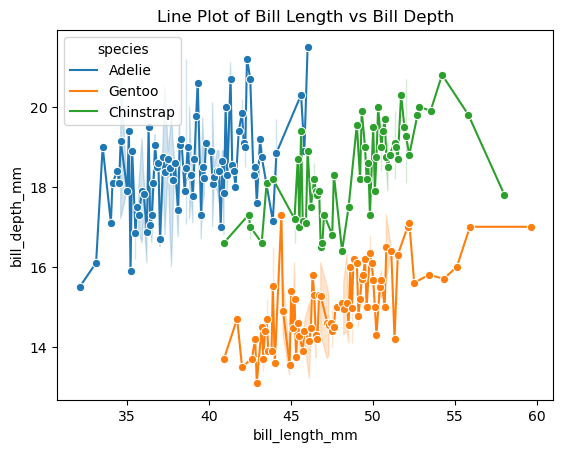

In [178]:
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_clean, marker="o")
plt.title('Line Plot of Bill Length vs Bill Depth')
plt.show()

* Hex plot

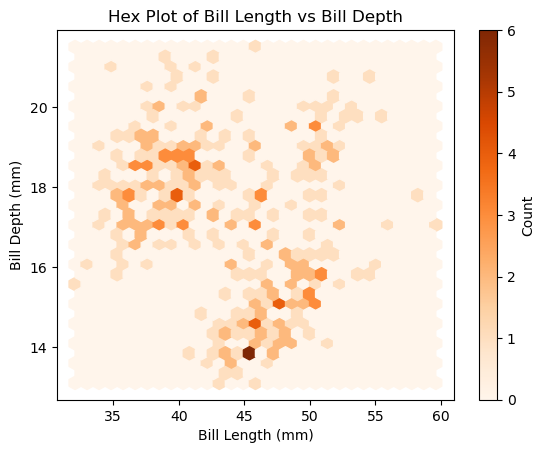

In [179]:
plt.hexbin(df_clean['bill_length_mm'], df_clean['bill_depth_mm'], gridsize=30, cmap='Oranges')
plt.colorbar(label='Count')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Hex Plot of Bill Length vs Bill Depth')
plt.show()

* Regression plot

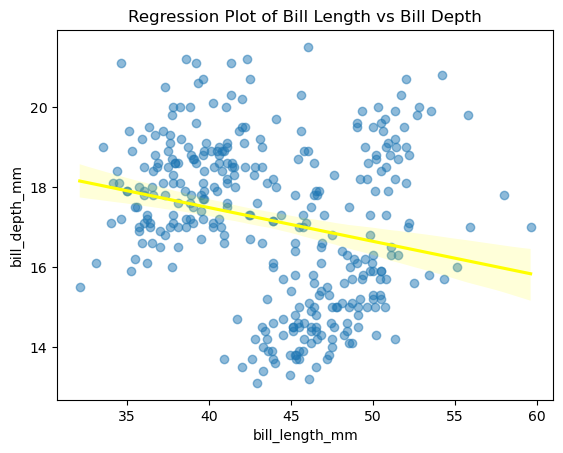

In [185]:
sns.regplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'alpha':0.5}, line_kws={'color':'yellow'})
plt.title('Regression Plot of Bill Length vs Bill Depth')
plt.show()

#### Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [180]:
max_flipper_length = df_clean.groupby(['species', 'island'])['flipper_length_mm'].max()

longest_flippers = []
for island in df_clean['island'].unique():
    island_data = max_flipper_length[max_flipper_length.index.get_level_values('island') == island]
    max_length = island_data.max()
    species_with_max_length = island_data[island_data == max_length].index.get_level_values('species').tolist()
    for species in species_with_max_length:
        longest_flippers.append({'species': species, 'island': island, 'flipper_length_mm': max_length})

longest_flippers_df = pd.DataFrame(longest_flippers)

print("Species with the longest flippers on each island:")
print(longest_flippers_df[['species', 'island', 'flipper_length_mm']])

Species with the longest flippers on each island:
     species     island  flipper_length_mm
0     Adelie  Torgersen              210.0
1     Gentoo     Biscoe              231.0
2  Chinstrap      Dream              212.0


#### Q8: Perform z-score normalization on this dataset.

In [181]:
data_normalized = df_clean.copy()
data_normalized[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = data_normalized[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].apply(zscore)

data_normalized.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-8.822304e-01,7.877425e-01,-1.422488,-0.470213,male
1,Adelie,Torgersen,-8.083550e-01,1.265563e-01,-1.065352,-0.425343,female
2,Adelie,Torgersen,-6.606041e-01,4.317192e-01,-0.422507,-0.918910,female
3,Adelie,Torgersen,3.936873e-15,3.613854e-15,0.000000,0.000000,male
4,Adelie,Torgersen,-1.325483e+00,1.092905e+00,-0.565361,-0.739431,female
